Задание
К вам на анализ попал набор данных  о работе сервиса по продаже авиабилетов с дневной агрегацией. Вашей задаче будет рассчитать определенные показатели для каждого месяца, представленные ниже. 

Данные содержат:

- Дату
- Идентификатор сессии
- Идентификатор пользователя
- Сумму оплаты во время сессии
- Оценку сервиса (она запрашивается у пользователя после оформления билетов) 

Используя данные, рассчитайте показатели для каждого месяца:

- Количество сессий
- MAU
- WAU (среднее)
- DAU (среднее)
- Липкость 
- Конверсию в продажу
- ARPU
- ARPPU
- Удовлетворенность клиентов
- Для второй недели января рассчитайте Retention с 1 по 10 недели. Постройте график, сделайте выводы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
# Загрузка данных
df = pd.read_csv('data/data.csv')

### Изучение данных

In [3]:
df.head(3)

,Дата,ID сессии,ID клиента,Доход,Оценка
0,2021-01-05,eeehjltlceclayhacecerhyyxhrxs,45870310,0.0,NaN
1,2021-01-06,eeehrcecacecerlrhacecerygejeb,76545402,0.0,NaN
2,2021-01-06,eeehalhalhjaracecerxhrhtrm,424242,0.0,NaN


In [4]:
#Проверяю типы данных и пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19010 entries, 0 to 19009
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Дата        19010 non-null  object 
 1   ID сессии   19010 non-null  object 
 2   ID клиента  19010 non-null  int64  
 3   Доход       19010 non-null  float64
 4   Оценка      4267 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 742.7+ KB


In [5]:
#Статистическая информация
df.describe(include = 'all')

,Дата,ID сессии,ID клиента,Доход,Оценка
count,19010,19010,1.901000e+04,19010.000000,4267.000000
unique,82,15820,NaN,NaN,NaN
top,2021-03-03,alehcecythceclghacecerrvrercos,NaN,NaN,NaN
freq,773,5,NaN,NaN,NaN
mean,NaN,NaN,3.549618e+07,3963.978442,4.009374
std,NaN,NaN,2.282924e+08,9566.704251,0.814430
min,NaN,NaN,3.400000e+02,0.000000,3.000000
25%,NaN,NaN,4.121286e+06,0.000000,3.000000
50%,NaN,NaN,1.344219e+07,0.000000,4.000000
75%,NaN,NaN,4.224403e+07,0.000000,5.000000


В датасете есть дубликаты ID сессии

## Предобработка данных

In [6]:
#Переименовываю столбецы 
df.rename(columns 
                 = {'Дата': 'date', 'ID сессии': 'id_ses', 'Оценка': 'evaluation', 
                    'ID клиента': 'id_user', 'Доход': 'income'}, inplace = True)
#Меняю тип данных в колонках с датой
df.date = df.date.astype("datetime64[ns]")
#Удаляю дубликаты
df.drop_duplicates(subset = "id_ses", inplace = True)
df.reset_index(drop = True, inplace = True)
#Удаляю дубликаты id_ses
df.drop_duplicates(subset = "id_ses", inplace = True)
df.reset_index(drop = True, inplace = True)
# Проверка на дубликаты
print(f'В датасете {len(df) - len(df.drop_duplicates())} дубликатов строк')
# добавляю столбецы 
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['week'] = df.date.dt.to_period('W')

В датасете 0 дубликатов строк


## Раcчет показателей

In [7]:
#Количество сессий
df_session = df.groupby(by = 'month').id_ses.count().reset_index()
df_session.rename(columns = {'id_ses': 'quan_ses'}, inplace = True)
#MAU
df_mau = df.groupby(by = 'month').id_user.nunique().reset_index()
df_mau.rename(columns = {'id_user': 'mau'}, inplace = True)
#DAU
df_dau = df.groupby(by = 'date').id_user.nunique().reset_index()
df_dau.rename(columns = {'id_user': 'dau'}, inplace = True)
#WAU
df_wau = df.groupby(by = 'week').id_user.nunique().reset_index()
df_wau.rename(columns = {'id_user': 'wau'}, inplace = True)
#Конверсия
df_conv = df.query("income > 0").groupby(by = 'month').income.count().reset_index()
df_conv.rename(columns = {'income': 'conv'}, inplace = True)
#Уникальные пользователи совершившие покупку
df_purchase = df.query("income > 0").groupby(by = 'month').id_user.nunique().reset_index()
df_purchase.rename(columns = {'id_user': 'purchase'}, inplace = True)
#Доход
df_income = df.groupby(by = 'month').income.sum().reset_index()
df_income.rename(columns = {'income': 'income_month'}, inplace = True)
#Удовлетворенность клиентов
df_evaluation = df.query("income > 0").groupby(by = 'month').evaluation.mean().reset_index()
df_evaluation.rename(columns = {'evaluation': 'evaluation_mean'}, inplace = True)
#Добавляю показатели в датасет
df = df.merge(df_dau, how='left', on='date')
df = df.merge(df_wau, how='left', on='week')
df = df.merge(df_mau, how='left', on='month')
df = df.merge(df_session, how='left', on='month')
df = df.merge(df_conv, how='left', on='month')
df = df.merge(df_purchase, how='left', on='month')
df = df.merge(df_income, how='left', on='month')
df = df.merge(df_evaluation, how='left', on='month')
#Созадю датсет с показателями по месяцам
df_month = df.groupby(by = 'month', 
                      as_index = False)[['dau', 'wau', 'mau',  'conv', 'quan_ses', 
                                         'purchase', 'income_month', 'evaluation']].mean()
#Добавляю в датасет липкость, ARPU, ARPPU
df_month['stickiness'] = df_month.dau / df_month.mau
df_month['arpu'] = df_month.income_month / df_month.mau
df_month['arppu'] = df_month.income_month / df_month.purchase

df_month

,month,dau,wau,mau,conv,quan_ses,purchase,income_month,evaluation,stickiness,arpu,arppu
0,1,162.910025,872.041800,2495.0,1333.0,2823.0,1263.0,2.227633e+07,3.990998,0.065295,8928.387974,17637.631033
1,2,343.583212,2022.900236,7546.0,1233.0,8911.0,1189.0,2.364104e+07,4.005677,0.045532,3132.922945,19883.125769
2,3,353.822075,1923.008076,3610.0,917.0,4086.0,887.0,1.536327e+07,4.027263,0.098012,4255.752357,17320.480281


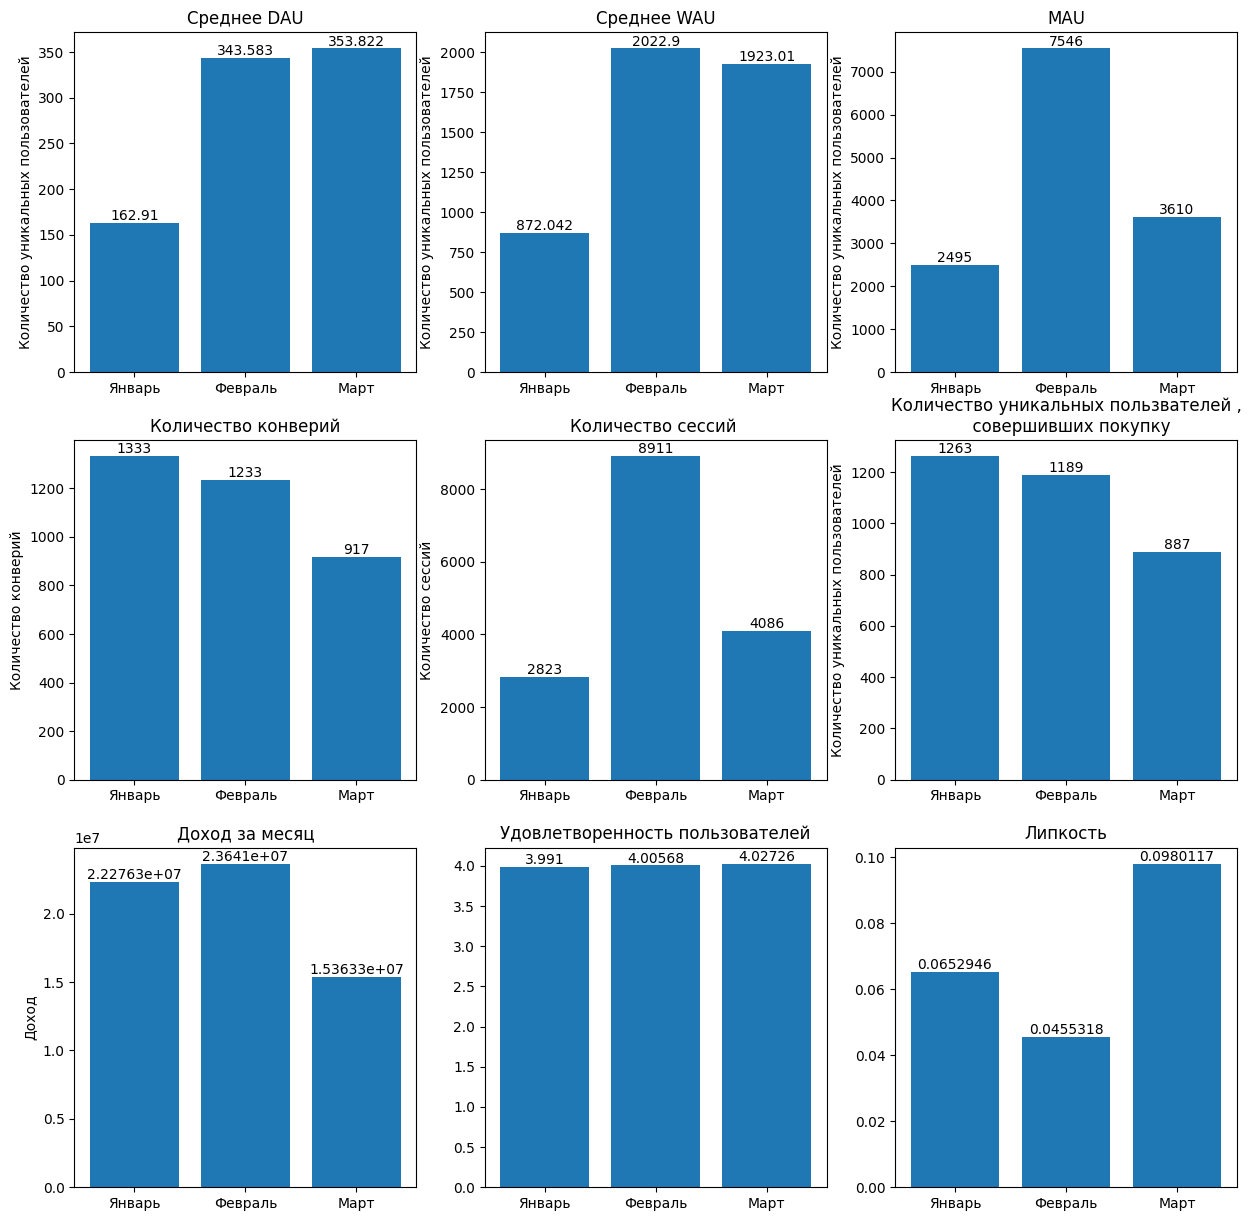

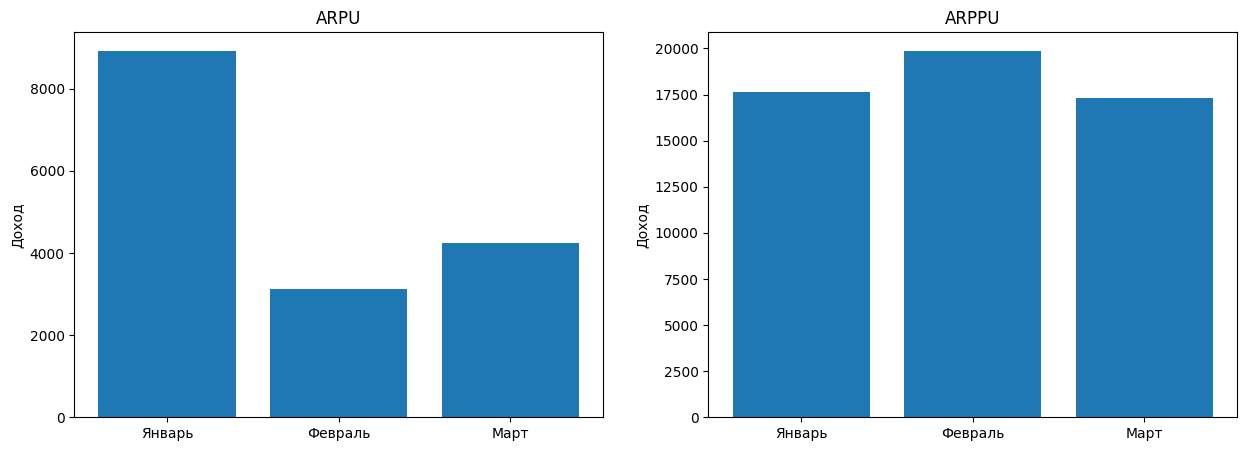

In [8]:
# Визуализация показателей
month_ = ['Январь', 'Февраль', 'Март']
fig, axs =  plt.subplots(3, 3, figsize = [15, 15]) 

axs[0, 0].bar(x = month_, height = df_month.dau)
axs[0, 0].set_title('Cреднее DAU')
axs[0, 0].set_ylabel('Количество уникальных пользователей')

axs[0, 1].bar(x = month_, height = df_month.wau)
axs[0, 1].set_title('Cреднее WAU')
axs[0, 1].set_ylabel('Количество уникальных пользователей')

axs[0, 2].bar(x = month_, height = df_month.mau)
axs[0, 2].set_title('MAU')
axs[0, 2].set_ylabel('Количество уникальных пользователей')

axs[1, 0].bar(x = month_, height = df_month.conv)
axs[1, 0].set_title('Количество конверий')
axs[1, 0].set_ylabel('Количество конверий')

axs[1, 1].bar(x = month_, height = df_month.quan_ses)
axs[1, 1].set_title('Количество сессий ')
axs[1, 1].set_ylabel('Количество сессий')

axs[1, 2].bar(x = month_, height = df_month.purchase)
axs[1, 2].set_title('Количество уникальных пользвателей ,\n  совершивших покупку')
axs[1, 2].set_ylabel('Количество уникальных пользователей')

axs[2, 0].bar(x = month_, height = df_month.income_month)
axs[2, 0].set_title('Доход за месяц')
axs[2, 0].set_ylabel('Доход')

axs[2, 1].bar(x = month_, height = df_month.evaluation)
axs[2, 1].set_title('Удовлетворенность пользователей')
axs[2, 1].set_ylabel('')

axs[2, 2].bar(x = month_, height = df_month.stickiness)
axs[2, 2].set_title('Липкость')
axs[2, 2].set_ylabel('')

axs[0, 0].bar_label(axs[0, 0].containers[0], fontsize=10)
axs[0, 1].bar_label(axs[0, 1].containers[0], fontsize=10)
axs[0, 2].bar_label(axs[0, 2].containers[0], fontsize=10)
axs[1, 0].bar_label(axs[1, 0].containers[0], fontsize=10)
axs[1, 1].bar_label(axs[1, 1].containers[0], fontsize=10)
axs[1, 2].bar_label(axs[1, 2].containers[0], fontsize=10)
axs[2, 0].bar_label(axs[2, 0].containers[0], fontsize=10)
axs[2, 1].bar_label(axs[2, 1].containers[0], fontsize=10)
axs[2, 2].bar_label(axs[2, 2].containers[0], fontsize=10)

fig, ax =  plt.subplots(1, 2, figsize = [15, 5]) 
ax[0].bar(x = month_, height = df_month.arpu)
ax[0].set_title('ARPU')
ax[0].set_ylabel('Доход')
ax[1].bar(x = month_, height = df_month.arppu)
ax[1].set_title('ARPPU')
ax[1].set_ylabel('Доход')
plt.show();

In [9]:
#Расчет Retention с 1 по 10 недели
start_date = pd.to_datetime('2021-01-11')
end_week_date = start_date + pd.DateOffset(days = 6)
end_date = start_date - pd.DateOffset(days = 1) + pd.DateOffset(weeks = 11)
df_second_week = df[(df.date >= start_date) & (df.date <= end_week_date)] # вторая неделя
df_10_week = df[(df.date >= start_date) & (df.date <= end_date)] # с 1 по 10 недели
#Создадим множество уникальных пользователй второй недели января
n = set(df_second_week.id_user.to_list()) #Создаю множество уникальных пользователй второй недели января
df_10_week = df_10_week[df_10_week.id_user.isin(n)]#Уникальные пользователй второй недели января в 1-10 недели
#Уникальные пользователй второй недели по неделяям с 1 по 10
df_retention = df_10_week.groupby(by = 'week').id_user.nunique().reset_index()
#Добавляю столбец с retention
for i in range(df_retention.shape[0]):
    df_retention.loc[i, 'retention'] = df_retention.loc[i, 'id_user'] / df_retention.loc[0, 'id_user'] * 100
df_retention

,week,id_user,retention
0,2021-01-11/2021-01-17,741,100.000000
1,2021-01-18/2021-01-24,39,5.263158
2,2021-01-25/2021-01-31,17,2.294197
3,2021-02-01/2021-02-07,40,5.398111
4,2021-02-08/2021-02-14,32,4.318489
5,2021-02-15/2021-02-21,27,3.643725
6,2021-02-22/2021-02-28,33,4.453441
7,2021-03-01/2021-03-07,22,2.968961
8,2021-03-08/2021-03-14,28,3.778677
9,2021-03-22/2021-03-28,1,0.134953


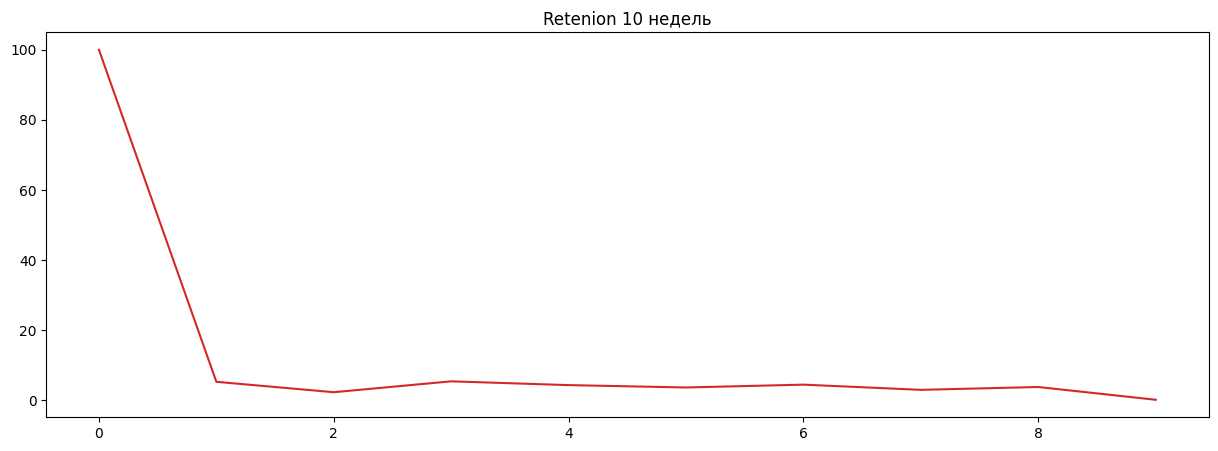

In [10]:
#Визуализация Retention
plt.figure(figsize=(15,5))
plt.plot(df_retention.index, df_retention.retention, color='tab:red')
plt.title('Retenion 10 недель')
plt.show();

Retention резко падает ко второй неделе, а далее почти не меняется